In [2]:
pip install numpy

In [3]:
pip install pybitflyer

  Created wheel for pybitflyer: filename=pybitflyer-0.1.9-cp37-none-any.whl size=7047 sha256=51a35a75cac9d61923355badc25b42e776d31587e7fc7f01bea916135177c5c8
  Stored in directory: /root/.cache/pip/wheels/b1/f8/7d/de947eb15ac821af1baa340bc32fff796a951a36715dcbb9e2
Successfully built pybitflyer


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# bitFlyerにアクセスするのに使う
import pybitflyer
# 時間の管理に使う
import time
from datetime import datetime
# リアルタイムプロットに必要
from ipywidgets import FloatProgress
from IPython.display import display, clear_output
# Jupyter環境でグラフを表示するのに必要
%matplotlib inline

api = pybitflyer.API()
ticker = api.ticker(product_code="BTC_JPY")
print(ticker)

{'product_code': 'BTC_JPY', 'state': 'RUNNING', 'timestamp': '2021-03-19T18:00:53.87', 'tick_id': 766126, 'best_bid': 6413256.0, 'best_ask': 6415045.0, 'best_bid_size': 0.1061, 'best_ask_size': 0.005794, 'total_bid_depth': 877.26980519, 'total_ask_depth': 909.65064879, 'market_bid_size': 0.0, 'market_ask_size': 0.0, 'ltp': 6412356.0, 'volume': 14930.17795053, 'volume_by_product': 6565.85132878}


KeyboardInterrupt: ignored

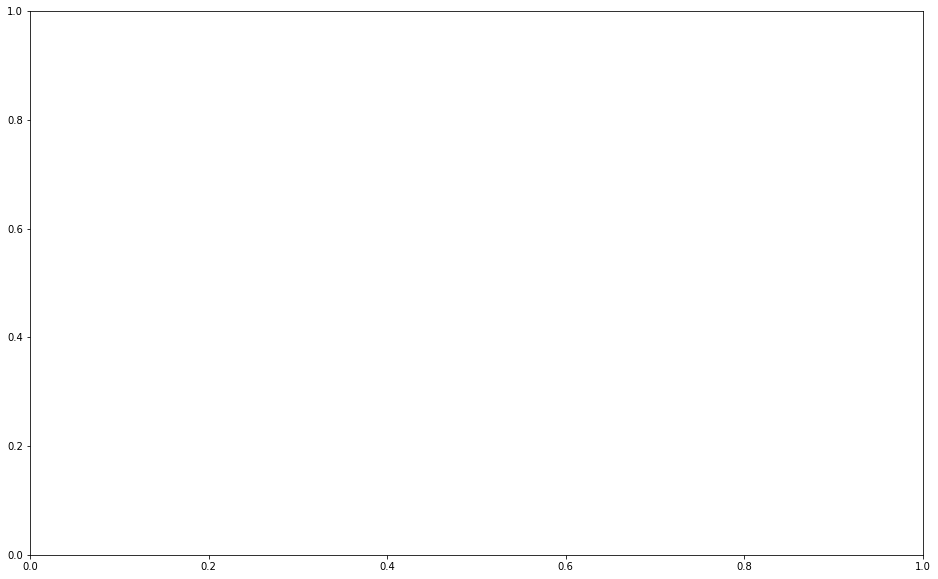

In [10]:
# 最終取引価格を格納する配列
raws = []
# プロットの準備
fig = plt.figure(figsize=(16,10))
axe = fig.add_subplot(111)

while True:
    # 毎分00秒に稼働
    if datetime.now().strftime('%S') [0:2]== '00':
        clear_output(wait = True)
        # プロット用データの更新
        tick = api.ticker(product_code = "BTC_JPY")
        raws = np.append(raws, tick['ltp'])
        # プロット
        axe.plot(raws, "black", linewidth=2, label="Raw price")
        axe.set_title("Raw price")
        display(fig)
        # 次の00秒まで休憩
        time.sleep(57)
        axe.cla()

In [11]:
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
from matplotlib.dates import date2num

fig = plt.figure()
ax = plt.subplot()

xdate = [x.date() for x in df.index] #Timestamp -> datetime
ohlc = np.vstack((date2num(xdate), df.values.T)).T #datetime -> float
mpf.candlestick_ohlc(ax, ohlc, width=0.7, colorup='g', colordown='r')

ax.grid() #グリッド表示
ax.set_xlim(df.index[0].date(), df.index[-1].date()) #x軸の範囲
fig.autofmt_xdate() #x軸のオートフォーマット

ModuleNotFoundError: ignored

In [12]:
pip install matplotlib.finance

ERROR: Could not find a version that satisfies the requirement matplotlib.finance (from versions: none)
ERROR: No matching distribution found for matplotlib.finance


In [14]:
import requests
response = requests.get("https://api.cryptowat.ch/markets/bitflyer/btcjpy/ohlc?periods=86400&after=1514764800")
data = response.json()

for item in data["result"]["86400"]:
	if item[0] == 1616112000:
		print(item[3])

6213860


In [15]:
import requests
from datetime import datetime

# CryptowatchのAPIで１分足を取得
response = requests.get("https://api.cryptowat.ch/markets/bitflyer/btcfxjpy/ohlc?periods=60")
response = response.json()

# 最後から２番目のローソク足を取り出す
data = response["result"]["60"][-2]

# ローソク足から日時・始値・終値を取り出す
close_time = datetime.fromtimestamp(data[0]).strftime('%Y/%m/%d %H:%M')
open_price = data[1]
close_price = data[4]

print( "時間： " + close_time
	+ " 始値： " + str(open_price)
	+ " 終値： " + str(close_price) )

時間： 2021/03/19 18:24 始値： 6734651 終値： 6742284


In [17]:
import requests
from datetime import datetime
import time

while True:

	response = requests.get("https://api.cryptowat.ch/markets/bitflyer/btcfxjpy/ohlc?periods=60")
	response = response.json()

	data = response["result"]["60"][-2]

	close_time = datetime.fromtimestamp(data[0]).strftime('%Y/%m/%d %H:%M')
	open_price = data[1]
	close_price = data[4]

	print( "時間： " + close_time
		+ " 始値： " + str(open_price)
		+ " 終値： " + str(close_price) )

	time.sleep(10)

時間： 2021/03/19 18:27 始値： 6745265 終値： 6757697
時間： 2021/03/19 18:27 始値： 6745265 終値： 6757697
時間： 2021/03/19 18:27 始値： 6745265 終値： 6757697
時間： 2021/03/19 18:27 始値： 6745265 終値： 6757697
時間： 2021/03/19 18:27 始値： 6745265 終値： 6757697
時間： 2021/03/19 18:27 始値： 6745265 終値： 6757697
時間： 2021/03/19 18:28 始値： 6757362 終値： 6757922


KeyboardInterrupt: ignored

In [18]:
import requests
from datetime import datetime
import time


# Cryptowatchから 〇分足のデータを取得する関数を作成
def get_price(min):

	# APIで価格を取得する
	response = requests.get("https://api.cryptowat.ch/markets/bitflyer/btcfxjpy/ohlc",params = { "periods" : min })
	response = response.json()
	data = response["result"][str(min)][-2]
	
	close_time = data[0]
	open_price = data[1]
	close_price = data[4]

	# 日時・終値・始値の３つを返す
	return close_time, open_price, close_price


# 日時・終値・始値を表示する関数を作成
def print_price( close_time, open_price, close_price ):
	print( "時間： " + datetime.fromtimestamp(close_time).strftime('%Y/%m/%d %H:%M')
		+ " 始値： " + str(open_price)
		+ " 終値： " + str(close_price) )


# ここからがメイン処理
last_time = 0
while True:
	# get_price()関数を使って最新のローソク足の日時・始値・終値を取得する
	close_time , open_price , close_price = get_price(60)
	
	if close_time != last_time:
		last_time = close_time
		
		# print_price()関数を使って価格データを表示する
		print_price( close_time,open_price,close_price )
	
	time.sleep(10)

時間： 2021/03/19 18:34 始値： 6772161 終値： 6766860
時間： 2021/03/19 18:35 始値： 6768867 終値： 6772857
時間： 2021/03/19 18:36 始値： 6772783 終値： 6759700
時間： 2021/03/19 18:37 始値： 6759500 終値： 6767747


KeyboardInterrupt: ignored